#**Chapter 2: Pytorch Neural Network Classification**


## what we'r going to cover
* Artitechture of Neural Network Classification Model
* input shapes and output shapes of the Neural Network (features and labels)
* Create custom data to view,fit on and predict on
* Steps in modeling : creating a model ,setting a loss function and optimizer, creating a training loop.evaluating a model
* Saving and loading model
* Harnessing the power of non-learnality
* Different Classification Evaluation Methods




---



## Classification inputs and outputs
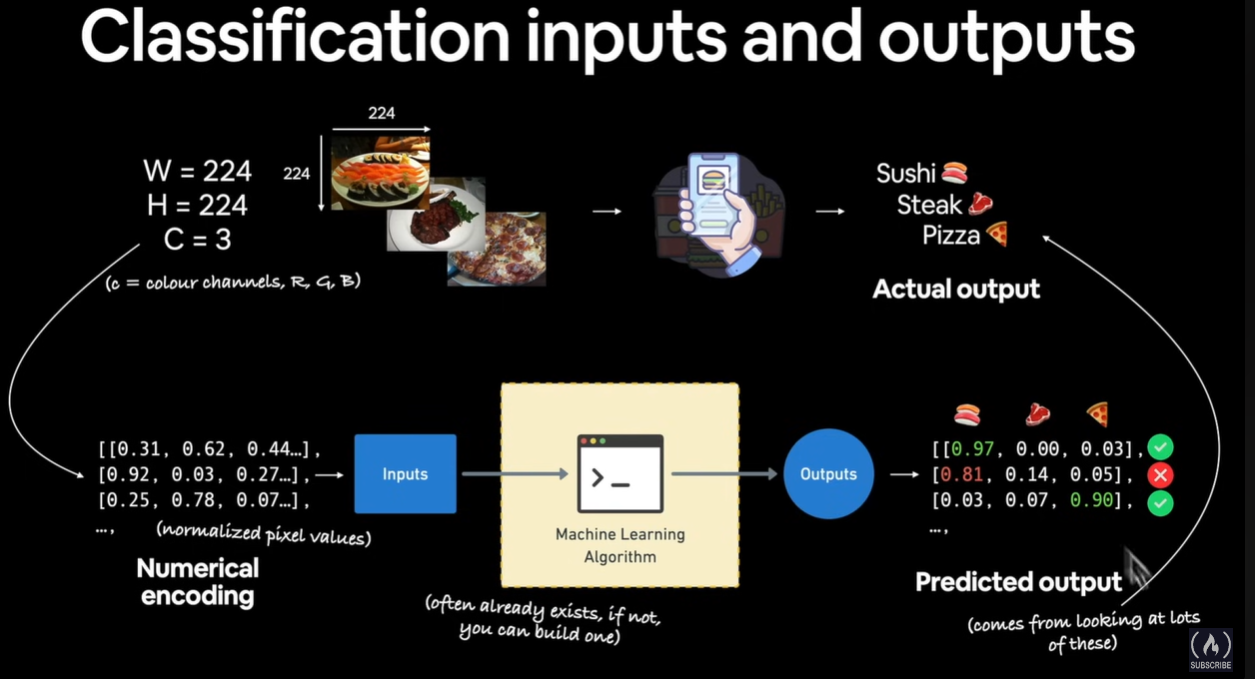

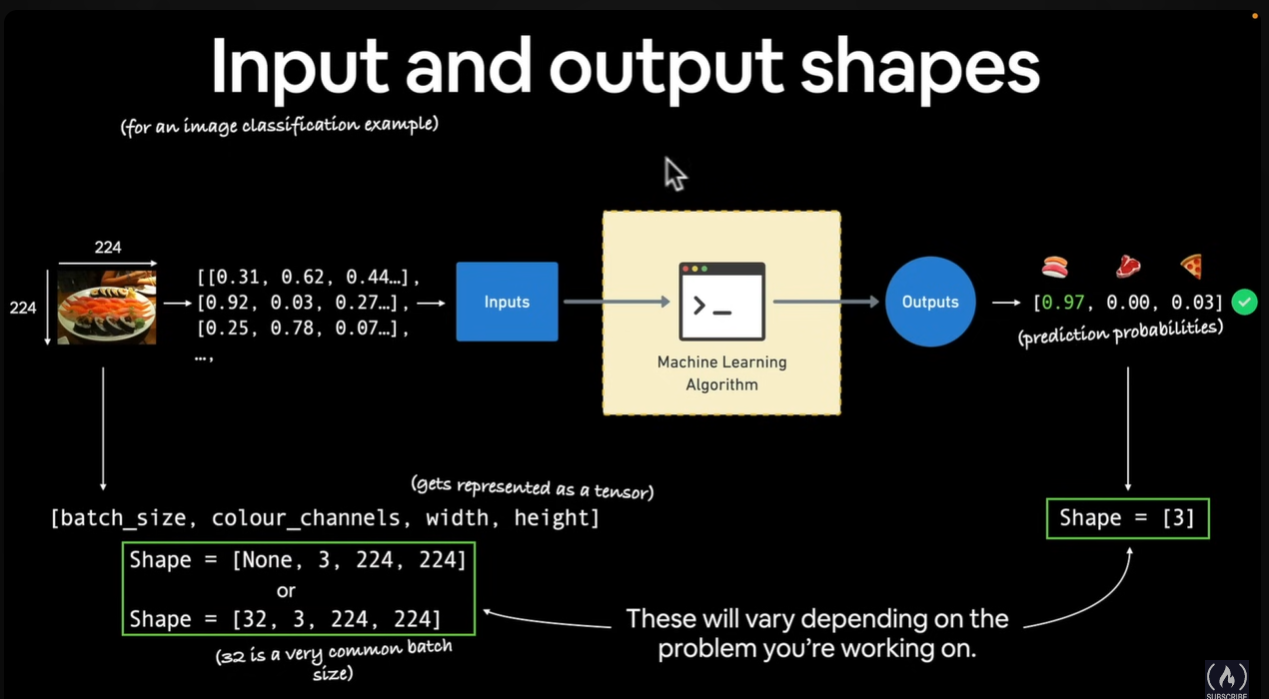

# **Artitechture of Classification Model**

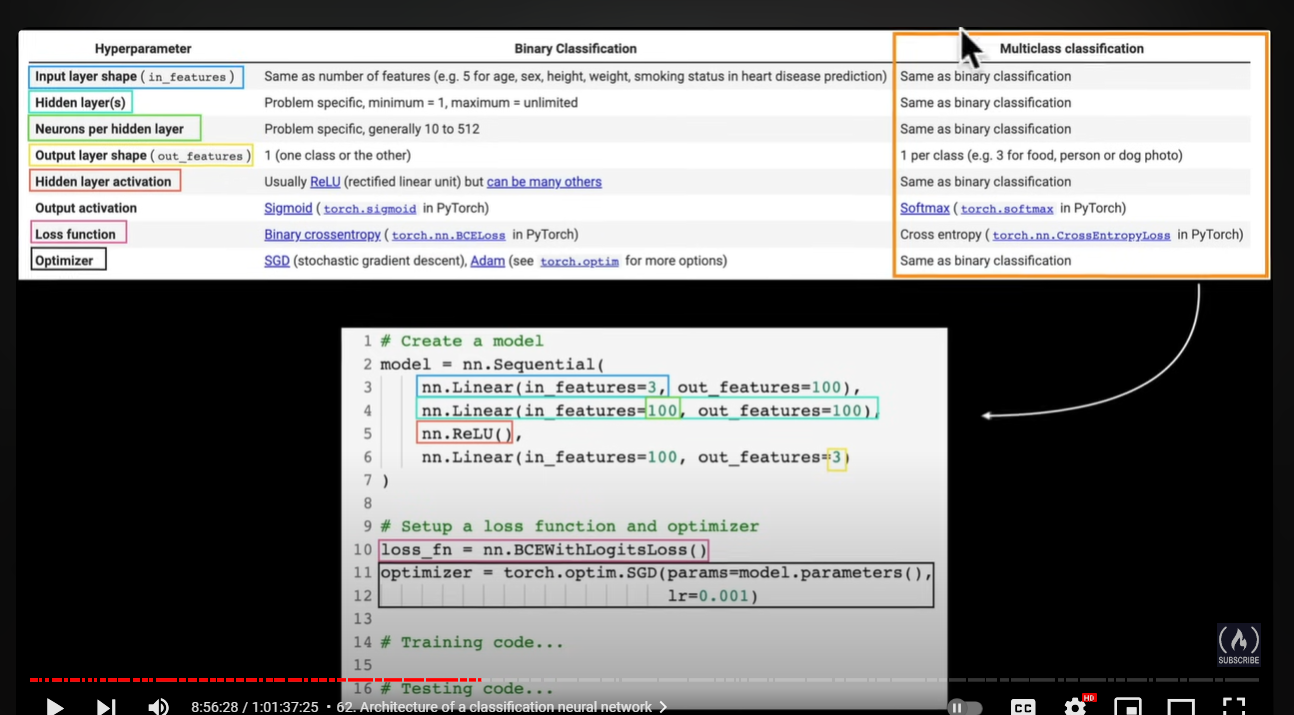

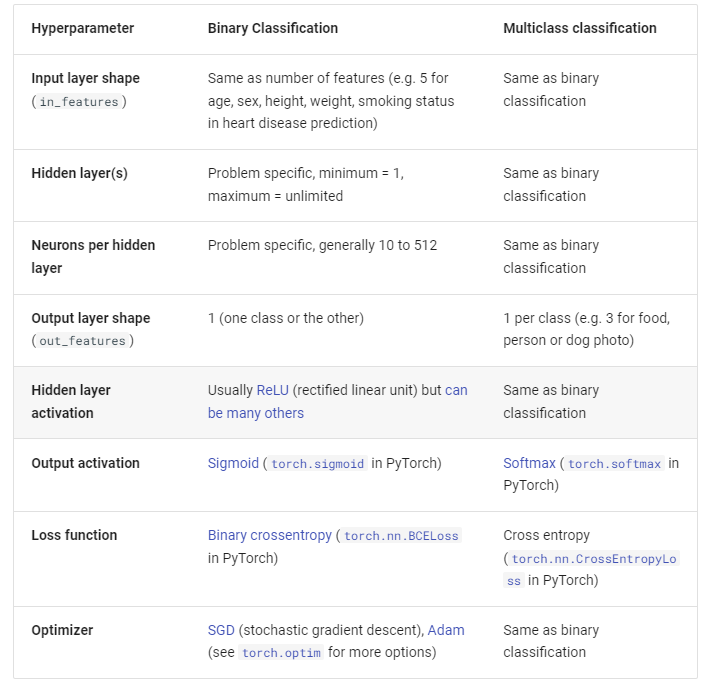

# **Lets Code**

#### *Sequential is type of neural network architechture where layers are organized in layers that are stacked sequentially one after other*

# Make Classification Data and get it ready

In [ ]:
from sklearn.datasets import make_circles

#Make 1000 samples
n_samples=1000
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

In [ ]:
len(X),len(y)

(1000, 1000)

In [ ]:
#print first 5 samples of X and y
print(X[:5]) ,print(y[:5])

[[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
[1 1 1 1 0]


(None, None)

In [ ]:
# Make Dataframe
import pandas as pd
df=pd.DataFrame({"X1":X[:,0],
                 "X2":X[:,1],
                 "label":y})

df.head(10)

X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
5 -0.479646  0.676435      1
6 -0.013648  0.803349      1
7  0.771513  0.147760      1
8 -0.169322 -0.793456      1
9 -0.121486  1.021509      0

In [ ]:
df.label.unique()

array([1, 0])

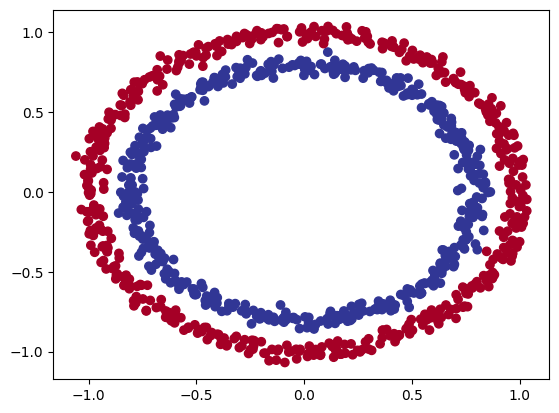

In [ ]:
# visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

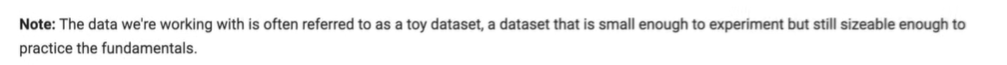

#1.1 Check input and output shapes

In [ ]:
X.shape,y.shape

((1000, 2), (1000,))

# Create Data into Tensor and convert it into test and train split


In [ ]:
import torch
torch.__version__

'2.5.1+cu121'

In [ ]:
X.dtype


dtype('float64')

In [ ]:
type(X)

numpy.ndarray

In [ ]:
#Turn data into tensor
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [ ]:
type(X),type(y)

(torch.Tensor, torch.Tensor)

In [ ]:
X.shape,y.shape

(torch.Size([1000, 2]), torch.Size([1000]))

In [ ]:
X[:5]

tensor([[ 0.7542,  0.2315],
        [-0.7562,  0.1533],
        [-0.8154,  0.1733],
        [-0.3937,  0.6929],
        [ 0.4422, -0.8967]])

In [ ]:
y[:5]

tensor([1., 1., 1., 1., 0.])

In [ ]:
#split dataset into training and testing using sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

In [ ]:
len(X_train),len(X_test) ,len(y_train),len(y_test)

(800, 200, 800, 200)

In [ ]:
n_samples

1000

#Building a model to classify our blue and red dot

To do so, we want to:
1. Setup device agonistic code so our code will run on an accelerator (GPU) if there is one
2. Construct a model (by subclassing nn. Module)
3. Define a loss function and optimizer
4. Create a training and test loop

#setup device agnostic code

In [ ]:
#import pytorch and nn
import torch
from torch import nn

#device agnostic code
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

#build model

1. Subclasses nn. Module (almost all models in PyTorch subclass nn. Module)
2. Create 2 nn. Linear() layers that are capable of handling the shapes of our data
3. Defines a forward() method that outlines the forward pass (or forward computation) of the model
4. Instatiate an instance of our model class and send it to the target device

In [ ]:
from sklearn import datasets
#construct model
class CircleModelv0(nn.Module):

  def __init__(self):
    super().__init__()
    #2 nn layers
    self.layer_1=nn.Linear(in_features=2,out_features=5)
    self.layer_2=nn.Linear(in_features=5,out_features=1)

  #forward() for forward pass
  def forward(self):
    return self.layer_2(self.layer_1(x)) #X->layer_1->layer_2->output

#instance of our model class and send it to device
model_0=CircleModelv0().to(device)
model_0



CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([[-0.5437,  0.1763],
         [ 0.1898,  0.3832],
         [-0.1709, -0.1846],
         [-0.4253, -0.3774],
         [ 0.1032, -0.4009]], requires_grad=True),
 Parameter containing:
 tensor([ 0.4037, -0.4048,  0.2451,  0.2460,  0.1304], requires_grad=True),
 Parameter containing:
 tensor([[-0.0368, -0.4171, -0.2654, -0.4043, -0.1651]], requires_grad=True),
 Parameter containing:
 tensor([0.4265], requires_grad=True)]

In [ ]:
next(model_0.parameters()).device

device(type='cpu')

In [ ]:
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[ 0.4868, -0.4461],
                      [-0.0280,  0.6766],
                      [-0.6237, -0.6287],
                      [ 0.2403, -0.3421],
                      [-0.6141, -0.2866]])),
             ('0.bias', tensor([ 0.2174, -0.2916,  0.4684, -0.4933, -0.6612])),
             ('1.weight',
              tensor([[-0.3072, -0.3741,  0.1927, -0.4023, -0.4328]])),
             ('1.bias', tensor([0.3394]))])

In [ ]:
#Make predicti on untrained model
untpred=model_0(X_test.to(device))
print(untpred[:10],'\n\n\n')
print(f"Length :{len(untpred)} | Shape :{untpred.shape}")

print('\n\n\n',y_test[:10])


tensor([[1.0071],
        [0.9787],
        [1.0123],
        [1.0060],
        [0.9021],
        [0.8856],
        [0.8928],
        [0.8707],
        [1.0169],
        [0.9756]], grad_fn=<SliceBackward0>) 



Length :200 | Shape :torch.Size([200, 1])



 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
#Make predicti on untrained model
untpred=model_0(X_test.to(device))
print(torch.round(untpred[:10]),'\n\n\n')
print(f"Length :{len(untpred)} | Shape :{untpred.shape}")

print('\n\n\n',y_test[:10])


tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<RoundBackward0>) 



Length :200 | Shape :torch.Size([200, 1])



 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
with torch.inference_mode():
  #Make predicti on untrained model
  untpred=model_0(X_test.to(device))
print(untpred[:10],'\n\n\n')
print(f"Length :{len(untpred)} | Shape :{untpred.shape}")

print('\n\n\n',y_test[:10])


tensor([[1.0071],
        [0.9787],
        [1.0123],
        [1.0060],
        [0.9021],
        [0.8856],
        [0.8928],
        [0.8707],
        [1.0169],
        [0.9756]]) 



Length :200 | Shape :torch.Size([200, 1])



 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


#setup loss function and optimizer


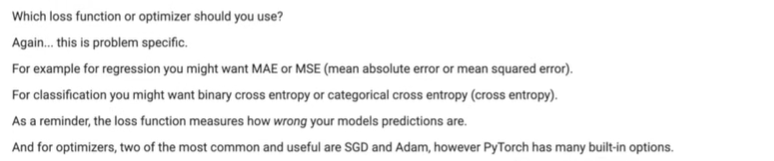

#what is a logit? (raw gueses of the model) we can say a value that goes to softmax for probability

Logits are the outputs of a neural network before the activation function is applied.


# BCEwithLogitLoss

combination of BCEloss and sigmoidfunction
first it will calculate the probabilities of logits and then use it to calculate loss

logit: output of final layer before feeding it to actiavation function


In [ ]:
#example of how BCElogitloss working
logits=torch.tensor([0.5,1.0,0,])
actual=torch.tensor([1.0,0.0,1.0])

#define instance of loss funtion
loss_fn=nn.BCEWithLogitsLoss()
loss=loss_fn(logits,actual)
print(loss.item())
print(loss)

0.82682865858078
tensor(0.8268)


#BCELoss:
requires input to go to sigmoid function to input to BCELoss

In [ ]:

# #same as BCEwithLogitsloss
# loss_fn00 = nn.Sequential(
#     nn.Sigmoid(),
#     nn.BCELoss()
# )
# logits = torch.tensor([0.5, 1.0, 0.0])
# actual = torch.tensor([1.0, 0.0, 1.0])

# # Apply Sigmoid to get predictions
# predictions = loss_fn[0](logits)  # Access Sigmoid layer using index 0
# predictions

# # Calculate loss using BCELoss (index 1) and predictions, actual
# loss1 = loss_fn[1](predictions, actual)

# print(loss1.item())
# print(loss1)


BCEWithLogitsLoss combines the sigmoid activation and binary cross-entropy (BCE) into a single operation, making it more efficient and numerically stable. Use it when your model outputs logits (raw scores), instead of probabilities.

In [ ]:
loos_fn=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


#Calculate Accuracy
correct predictions made by model

In [ ]:
logits = torch.tensor([0.0, 1.0, 1.0])
actual = torch.tensor([1.0, 0.0, 1.0])

acc=torch.eq(actual,logits).sum()
print(acc)

tensor(1)


In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(actual,logits))

0.3333333333333333


# Train Model

* forward pass
* calculate loss
* zero grad
* loss bakcward (backpropagation)
* optimizer(gradient descent)


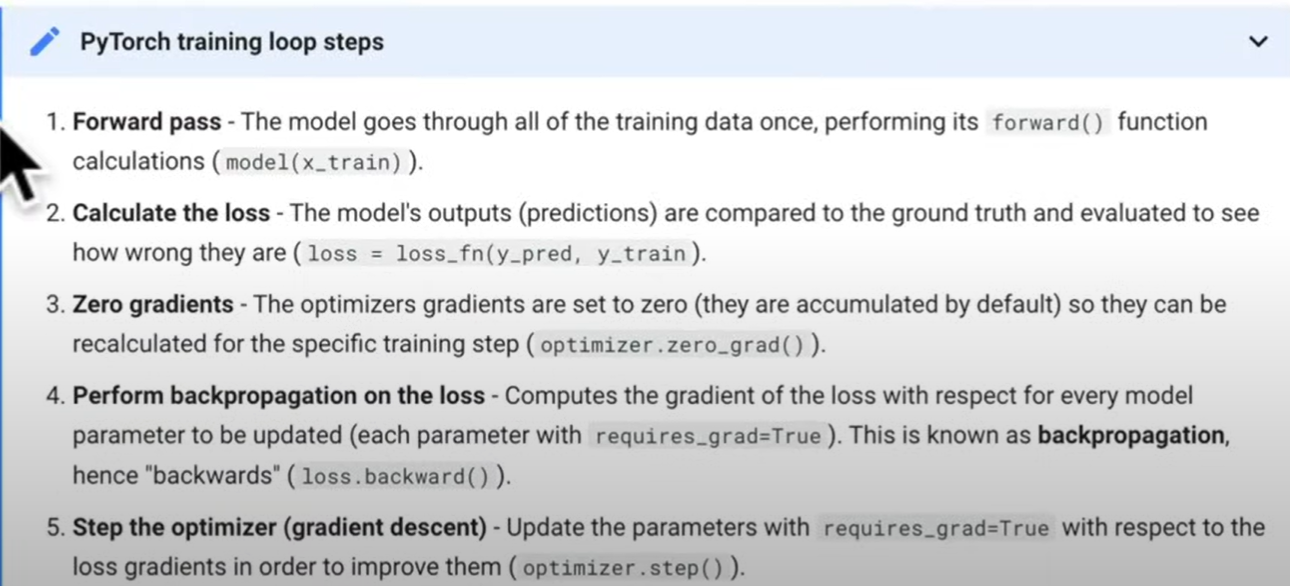


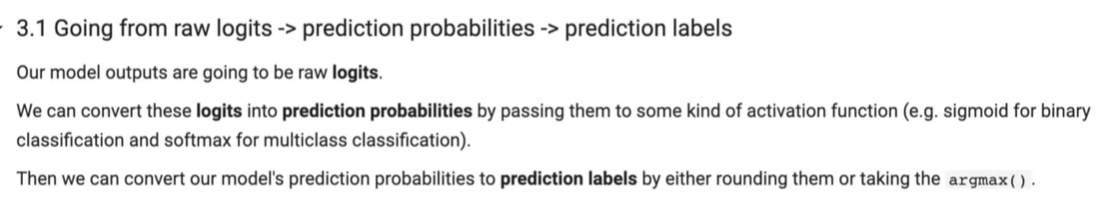

In [ ]:
#lets ouput 5 inputs
model_0.eval()
with torch.inference_mode():
  y_pred=model_0(X_test.to(device))[:5]
y_pred

tensor([[1.0071],
        [0.9787],
        [1.0123],
        [1.0060],
        [0.9021]])

In [ ]:
y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [ ]:
# use sigmoid for binary classfication
y_logits_pred=torch.sigmoid(y_pred)
y_logits_pred

tensor([[0.7325],
        [0.7268],
        [0.7335],
        [0.7322],
        [0.7114]])

In [ ]:
y_predd=torch.round(y_logits_pred)

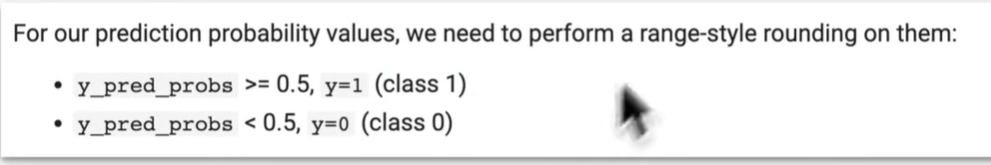

In [ ]:
#find predict label in one line
label_pred=torch.round(torch.sigmoid(model_0(X_test.to(device)))[:5])
print(label_pred)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], grad_fn=<RoundBackward0>)


In [ ]:
label_pred.shape

torch.Size([5, 1])

In [ ]:
yac=torch.eq(label_pred.squeeze(),y_predd.squeeze())
print(yac)
print(label_pred.squeeze())

tensor([True, True, True, True, True])
tensor([1., 1., 1., 1., 1.], grad_fn=<SqueezeBackward0>)


#Building a training and testing loop



In [ ]:
device

'cpu'

In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
print(X_train.shape)

torch.Size([800, 2])


In [ ]:
loss_fn=nn.BCEWithLogitsLoss()

In [ ]:
torch.cuda.manual_seed(42)
epochs=100
X_train,Y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  #Training
  model_0.train()

  #forward pass
  y_logits=model_0(X_train).squeeze() #suqeeze will remove extra dimension
  y_pred=torch.round(torch.sigmoid(y_logits)) #turn logits to pred-> prob->labels

  #calculate loss
  # loss=loss_fn(y_logits,torch.sigmoid(y_train)) # if you used BCELoss
  loss=loos_fn(y_logits,
               y_train)

  acc=accuracy_fn(y_true=y_logits,
                  y_pred=y_pred)

  #optimzer zero grad
  optimizer.zero_grad()

  #backward pass
  loss.backward()

  #optimizer step
  optimizer.step()

  #Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_logits=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fn(test_logits,
                      y_test)
    test_acc=accuracy_fn(test_logits,
                         y_test)

  #print out what happening in every 10 epochs

  if epoch % 10==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 10 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 20 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 30 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 40 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 50 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 60 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 70 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 80 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 90 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%


-------------------------------Again proper Implementation---------------------

In [ ]:
from sklearn.datasets import make_circles
import torch
#Make 1000 samples
n_samples=1000
X,y=make_circles(n_samples,
                 noise=0.03,
                 random_state=42)

In [ ]:
# Make Dataframe
import pandas as pd
df=pd.DataFrame({"X1":X[:,0],
                 "X2":X[:,1],
                 "label":y})

df.head(10)

X1        X2  label
0  0.754246  0.231481      1
1 -0.756159  0.153259      1
2 -0.815392  0.173282      1
3 -0.393731  0.692883      1
4  0.442208 -0.896723      0
5 -0.479646  0.676435      1
6 -0.013648  0.803349      1
7  0.771513  0.147760      1
8 -0.169322 -0.793456      1
9 -0.121486  1.021509      0

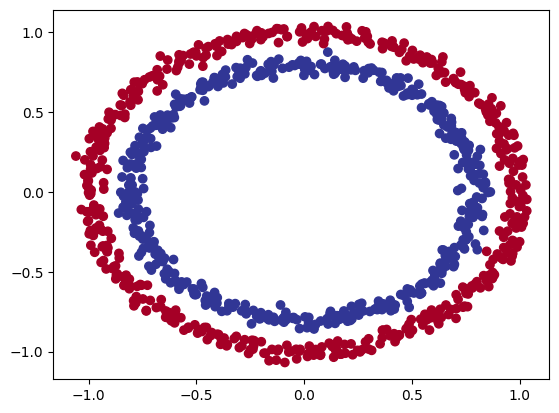

In [ ]:
# visualize
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu)
plt.show()

In [ ]:
#Turn data into tensor
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

In [ ]:
#split dataset into training and testing using sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,
                                               y,
                                               test_size=0.2,
                                               random_state=42)

In [ ]:
#import pytorch and nn
import torch
from torch import nn

#device agnostic code
device= 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [ ]:
model_0=nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5,out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
loos_fnm=nn.BCEWithLogitsLoss()
optimizer=torch.optim.SGD(params=model_0.parameters(),lr=0.1)


In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
torch.cuda.manual_seed(42)
epochs=100
X_train,Y_train=X_train.to(device),y_train.to(device)
X_test,y_test=X_test.to(device),y_test.to(device)

for epoch in range(epochs):
  #Training
  model_0.train()

  #forward pass
  y_logits=model_0(X_train).squeeze() #suqeeze will remove extra dimension
  y_pred=torch.round(torch.sigmoid(y_logits)) #turn logits to pred-> prob->labels

  #calculate loss
  # loss=loss_fn(y_logits,torch.sigmoid(y_train)) # if you used BCELoss
  loss=loos_fnm(y_logits,
               y_train)

  acc=accuracy_fn(y_true=y_logits,
                  y_pred=y_pred)

  #optimzer zero grad
  optimizer.zero_grad()

  #backward pass
  loss.backward()

  #optimizer step
  optimizer.step()

  #Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits=model_0(X_test).squeeze()
    test_logits=torch.round(torch.sigmoid(test_logits))
    test_loss=loos_fnm(test_logits,
                      y_test)
    test_acc=accuracy_fn(test_logits,
                         y_test)

  #print out what happening in every 10 epochs

  if epoch % 10==0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")




Epoch: 0 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 10 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 20 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 30 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 40 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 50 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 60 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 70 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 80 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%
Epoch: 90 | Loss: 0.69309, Accuracy: 0.00% | Test loss: 0.77041, Test acc: 48.00%


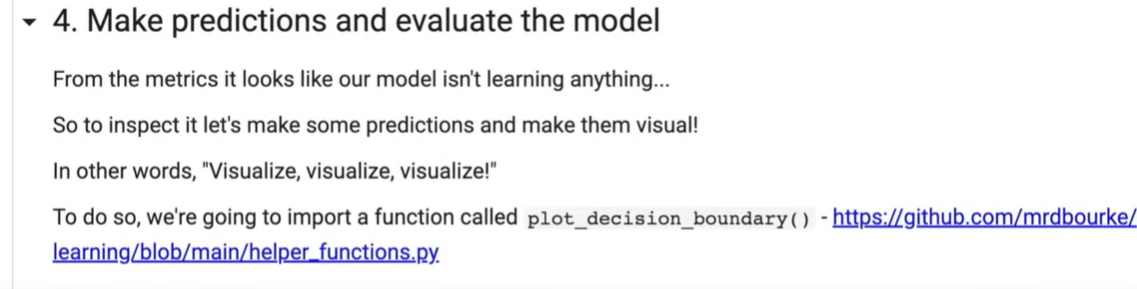

In [ ]:
import requests
from pathlib import Path
#dwonload helper function from learn pytorch dwonlaod repo if its not already downloaded
if Path('helper_functions.py').is_file():
  print("helper_functions.py already exits")
else:
  print('Downlaoding helper_funtions.py....')
  response=requests.get('https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py')
  with open("helper_functions.py","wb") as f:#wb: write binary
     f.write(response.content)




Downlaoding helper_funtions.py....


In [ ]:
from helper_functions import plot_predictions,plot_decision_boundary

In [ ]:
Path("helper_functions.py").is_file()

True

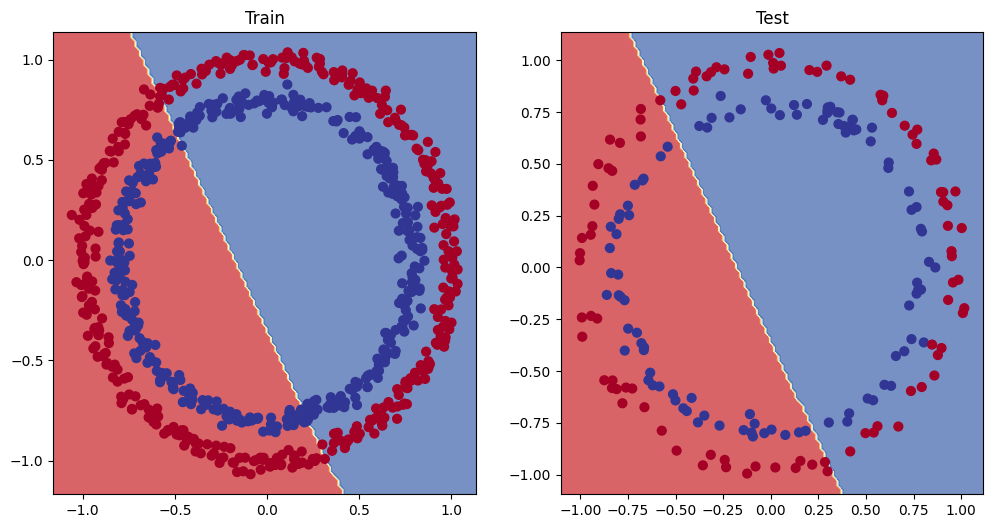

In [ ]:
from helper_functions import plot_predictions,plot_decision_boundary
#plot decision boundry of model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0,X_train,y_train)
plt.subplot(1,2,2,)
plt.title("Test")
plot_decision_boundary(model_0,X_test,y_test)


#improving a model


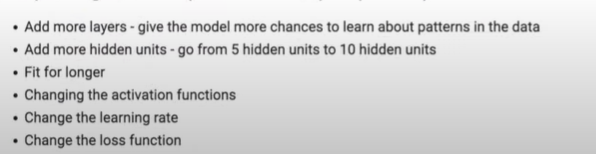

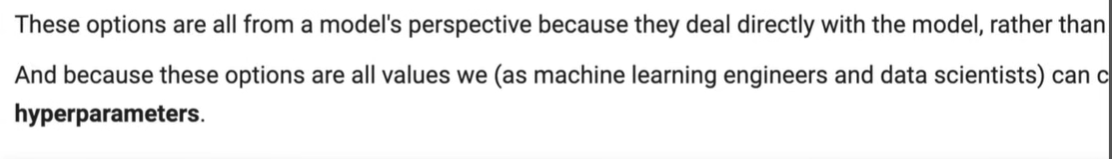

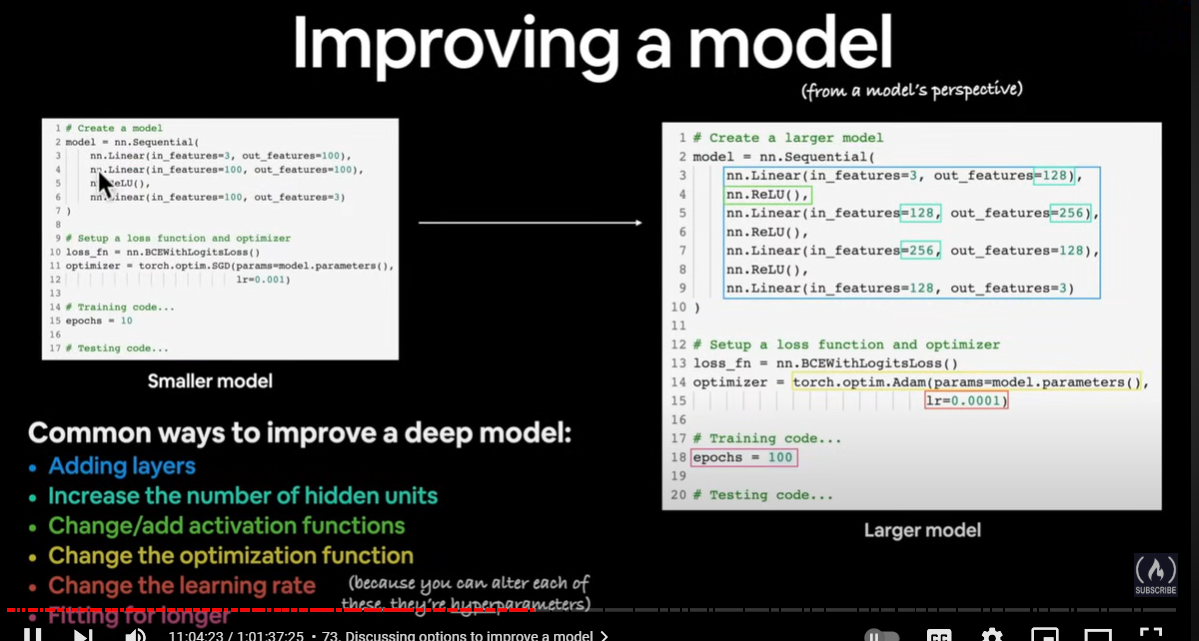

Hyperparameters are adjustable parameters that define the structure and behavior of a machine learning model or the learning process itself. Unlike model parameters (like weights in a neural network) that are learned during training, hyperparameters are set before training begins and remain constant throughout the training process.

#create new model

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


NameError: name 'X_train' is not defined

In [ ]:
class CircleModelNew(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer3(self.layer2(self.layer1(x)))

model_1=CircleModelNew().to(device)


NameError: name 'nn' is not defined

In [ ]:
device

'cpu'

In [ ]:
model_1.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]])),
             ('layer1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984])),
             ('layer2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310

In [ ]:
#create a loss function
loss_fn_1=nn.BCEWithLogitsLoss()

#create a optimizer
optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.1)

In [ ]:
#write training for evaluation and training for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#set no of epochs
epochs=1000

#set training loop
for epoch in range(epochs):
  #Training
  model_1.train()

  #forward pass
  y_logits=model_1(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits)) #logits->probability->label

  #calculate loss/acc
  loss=loss_fn_1(y_logits,y_train)
  acc=accuracy_fn(y_true=y_train,y_pred=y_pred)

  #optimizer zero grad
  optimizer.zero_grad()

  #backward pass
  loss.backward()

  #optimzer step update parameters
  optimizer.step()

  #testing loop

  model_1.eval()

  with torch.inference_mode():
    #forward pass
    test_logits=model_1(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))

    #calcualte loss and acc

    test_loss=loss_fn_1(test_logits,y_test)
    test_acc=accuracy_fn(y_true=y_test,y_pred=test_pred)

    #print out whats happening after each 100 epoc
    if epoch%100==0:
      print(f"Epoch : {epoch} | Loss : {loss}, Acc: {acc}% | Test Loss :{test_loss}, Test Accuracy :{test_acc}")

Epoch : 0 | Loss : 0.6952804327011108, Acc: 51.37500000000001% | Test Loss :0.6925174593925476, Test Accuracy :50.5
Epoch : 100 | Loss : 0.693254292011261, Acc: 47.875% | Test Loss :0.692826509475708, Test Accuracy :51.0
Epoch : 200 | Loss : 0.6930872201919556, Acc: 49.875% | Test Loss :0.6934381723403931, Test Accuracy :46.5
Epoch : 300 | Loss : 0.6930266618728638, Acc: 50.5% | Test Loss :0.6938426494598389, Test Accuracy :47.5
Epoch : 400 | Loss : 0.6930000185966492, Acc: 51.37500000000001% | Test Loss :0.694119393825531, Test Accuracy :46.5
Epoch : 500 | Loss : 0.6929885149002075, Acc: 51.125% | Test Loss :0.6943084597587585, Test Accuracy :46.0
Epoch : 600 | Loss : 0.6929835677146912, Acc: 51.5% | Test Loss :0.6944358348846436, Test Accuracy :46.0
Epoch : 700 | Loss : 0.6929814219474792, Acc: 51.37500000000001% | Test Loss :0.6945204138755798, Test Accuracy :45.5
Epoch : 800 | Loss : 0.6929805278778076, Acc: 51.5% | Test Loss :0.6945760250091553, Test Accuracy :44.5
Epoch : 900 | L

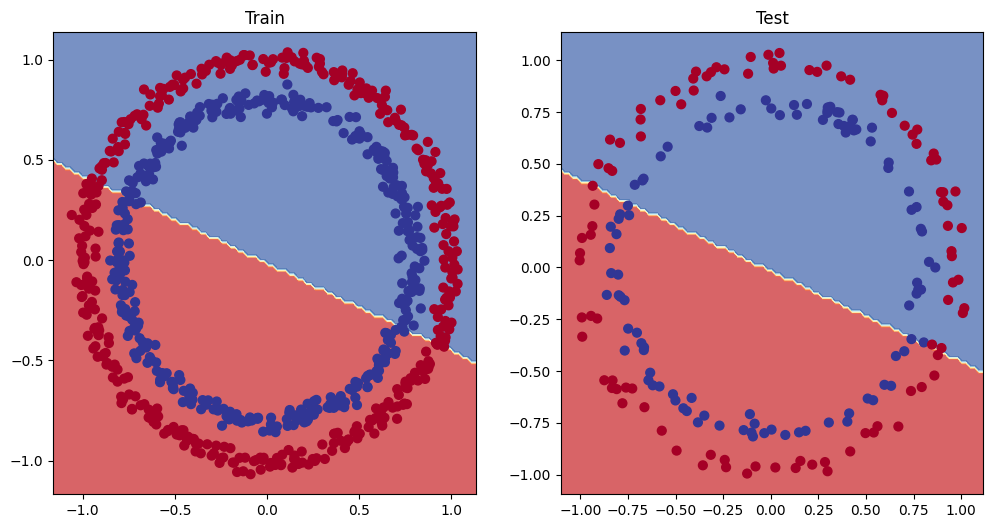

In [ ]:
#plot the decision boundry
from helper_functions import plot_predictions,plot_decision_boundary
#plot decision boundry of model
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_1,X_train,y_train)
plt.subplot(1,2,2,)
plt.title("Test")
plot_decision_boundary(model_1,X_test,y_test)


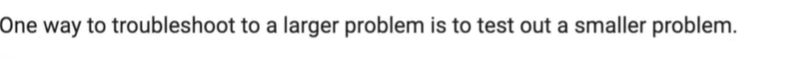

In [ ]:
#preparing data to check if our model can fit on staright line data
#create some data
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create data
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

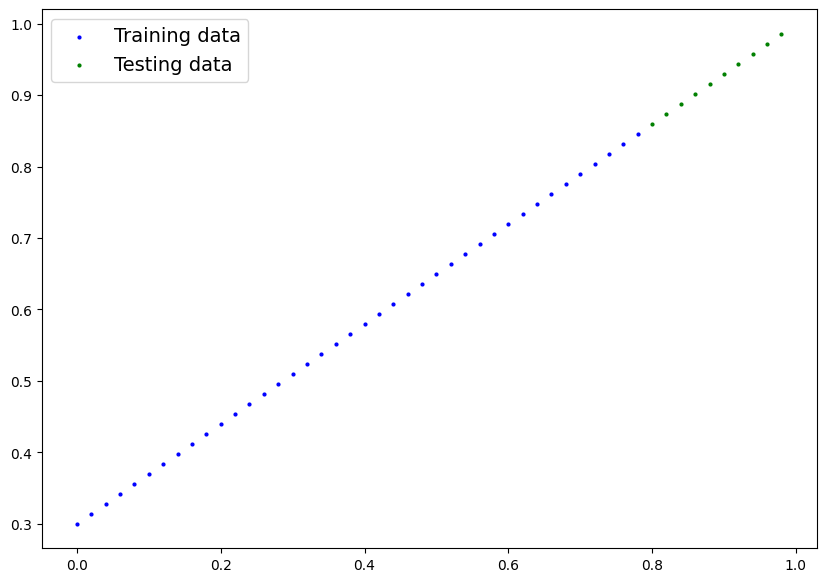

In [ ]:
plot_predictions(predictions=None, train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test)

In [ ]:
model_1

CircleModelNew(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

#adjusting model 1 to fit straight line


In [ ]:
model_2=nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1)
).to(device)

In [ ]:
model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
#loss and optimizer
loss_fn_2=nn.L1Loss()

#optimzier
optimizer_2=torch.optim.SGD(params=model_2.parameters(),
                            lr=0.01)

In [ ]:
#write training for evaluation and training for model_1
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

#set no of epochs
epochs=1000

for epoch in range(epochs):

  model_2.train()

  y_logits_2=model_2(X_train)
  loss_2=loss_fn_2(y_logits_2,y_train)
  optimizer_2.zero_grad()
  loss_2.backward()
  optimizer_2.step()

  #Testing
  model_2.eval()
  with torch.inference_mode():
    test_logits_2=model_2(X_test)
    test_loss_2=loss_fn_2(test_logits_2,y_test)
    if epoch%100==0:
      print(f"Epoch:{epoch} | Loss:{loss_2} | Test Loss:{test_loss_2}")


Epoch:0 | Loss:0.055121101438999176 | Test Loss:0.12296094000339508
Epoch:100 | Loss:0.009058166295289993 | Test Loss:0.006170487497001886
Epoch:200 | Loss:0.0064851692877709866 | Test Loss:0.012678909115493298
Epoch:300 | Loss:0.005855179391801357 | Test Loss:0.014129763469099998
Epoch:400 | Loss:0.005866792052984238 | Test Loss:0.01391302328556776
Epoch:500 | Loss:0.005878958851099014 | Test Loss:0.013689309358596802
Epoch:600 | Loss:0.005890397820621729 | Test Loss:0.013459831476211548
Epoch:700 | Loss:0.0059023224748671055 | Test Loss:0.013222766108810902
Epoch:800 | Loss:0.0059141009114682674 | Test Loss:0.012979060411453247
Epoch:900 | Loss:0.0052880472503602505 | Test Loss:0.01272917352616787


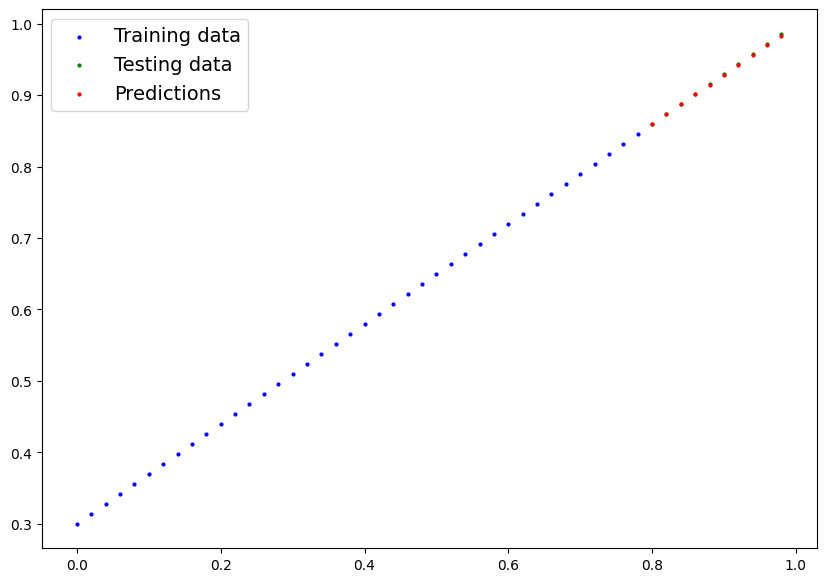

In [ ]:
model_2.eval()

with torch.inference_mode():
  y_preds=model_2(X_test)

plot_predictions(X_train,y_train,X_test,y_test,predictions=y_preds)

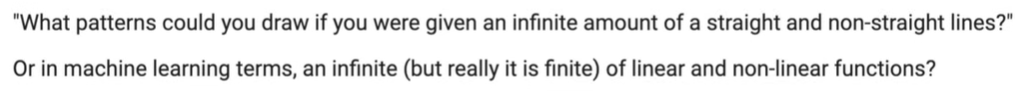

#recreating non linear data (red and blue circles)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
n_samples=1000
X,y=make_circles(n_samples=n_samples,
                 noise=0.02,
                 random_state=42)



In [ ]:
print(X)

[[ 0.76026594  0.22387823]
 [-0.76722217  0.1455425 ]
 [-0.80815854  0.14894355]
 ...
 [-0.14123526 -0.80195115]
 [ 0.67509008 -0.75465723]
 [ 0.28237752  0.96205688]]


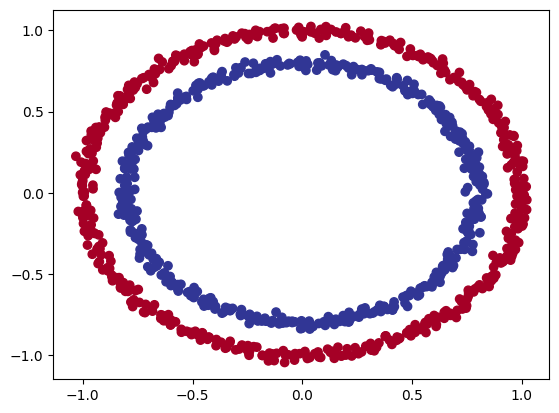

In [ ]:
plt.scatter(X[:, 0],X[:,1],c=y,cmap=plt.cm.RdYlBu)


In [ ]:
print(type(X))
print(type(y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
#convert data to tensors and then split dataset into testing and training
import torch
from sklearn.model_selection import train_test_split

#turn data into tensors
X=torch.from_numpy(X).type(torch.float)
y=torch.from_numpy(y).type(torch.float)

#test train split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


#building a model with non-linearity

In [ ]:
device= 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cpu'

In [ ]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100
    return acc

In [ ]:
from torch import nn

#build a model with non-linear activation function
class CircleModelnewv2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer1=nn.Linear(in_features=2,out_features=10)
    self.layer2=nn.Linear(in_features=10,out_features=10)
    self.layer3=nn.Linear(in_features=10,out_features=1)
    self.relu=nn.ReLU()

  def forward(self,x):
    return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x)))))

In [ ]:
model_3=CircleModelnewv2()


In [ ]:
model_3

CircleModelnewv2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
#setup loss and optimizer

loss_fnv2=nn.BCEWithLogitsLoss()

optimizerv2=torch.optim.SGD(params=model_3.parameters(),
                            lr=0.1)

In [ ]:
#Training the model

torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs=1000

X_train,X_test=X_train.to(device),X_test.to(device)
y_train,y_test=y_train.to(device),y_test.to(device)

for epoch in range(epochs):

  #train

  model_3.train()

  #forward pass
  y_logits=model_3(X_train).squeeze()
  y_pred=torch.round(torch.sigmoid(y_logits))

  #calculate loss
  loss=loss_fnv2(y_logits,
                 y_train)

  acc=accuracy_fn(y_true=y_train,
                  y_pred=y_pred)

  optimizerv2.zero_grad()

  loss.backward()

  optimizerv2.step()

  model_3.eval()

  with torch.inference_mode():
    test_logits=model_3(X_test).squeeze()
    test_pred=torch.round(torch.sigmoid(test_logits))
    test_loss=loss_fnv2(test_logits,
                        y_test)
    test_acc=accuracy_fn(y_true=y_test,
                         y_pred=test_pred)

    if epoch %100==0:
      print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc} | Test Loss: {test_loss} | Test Accuracy: {test_acc}")




Epoch: 0 | Loss: 0.6941289305686951 | Accuracy: 49.75 | Test Loss: 0.697165846824646 | Test Accuracy: 47.0
Epoch: 100 | Loss: 0.6915567517280579 | Accuracy: 50.5 | Test Loss: 0.6955610513687134 | Test Accuracy: 47.0
Epoch: 200 | Loss: 0.689501941204071 | Accuracy: 51.37500000000001 | Test Loss: 0.694328248500824 | Test Accuracy: 47.5
Epoch: 300 | Loss: 0.687247097492218 | Accuracy: 52.25 | Test Loss: 0.6933387517929077 | Test Accuracy: 46.0
Epoch: 400 | Loss: 0.6843237280845642 | Accuracy: 52.87500000000001 | Test Loss: 0.6919702291488647 | Test Accuracy: 48.0
Epoch: 500 | Loss: 0.6803944110870361 | Accuracy: 57.875 | Test Loss: 0.6898510456085205 | Test Accuracy: 54.50000000000001
Epoch: 600 | Loss: 0.6753708720207214 | Accuracy: 62.0 | Test Loss: 0.687075674533844 | Test Accuracy: 60.0
Epoch: 700 | Loss: 0.669160008430481 | Accuracy: 58.12500000000001 | Test Loss: 0.683518648147583 | Test Accuracy: 55.00000000000001
Epoch: 800 | Loss: 0.6618659496307373 | Accuracy: 60.5 | Test Loss: 

In [ ]:
model_3

CircleModelnewv2(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:
model_3.eval()
with torch.inference_mode():
  y_pred=torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_pred[:10] ,y_test[:10]

(tensor([1., 1., 0., 1., 1., 1., 0., 0., 0., 1.]),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.]))

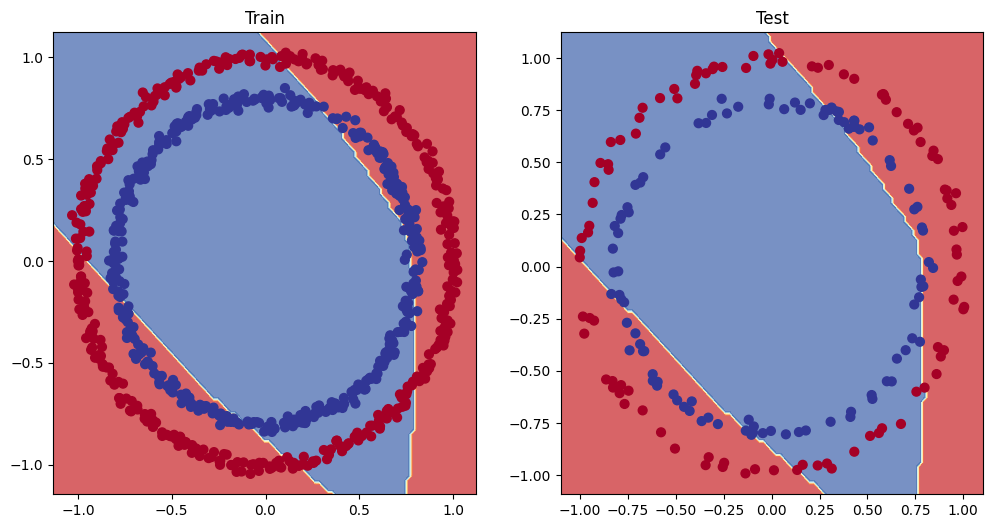

In [ ]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3,X_train,y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3,X_test,y_test)

***Challenge*** = try to improve the accuracy of model_3 80%>

#Replicating non-linear Activation functions

In [ ]:
A=torch.arange(-10,10,1,dtype=torch.float)
A.dtype

torch.float32

In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

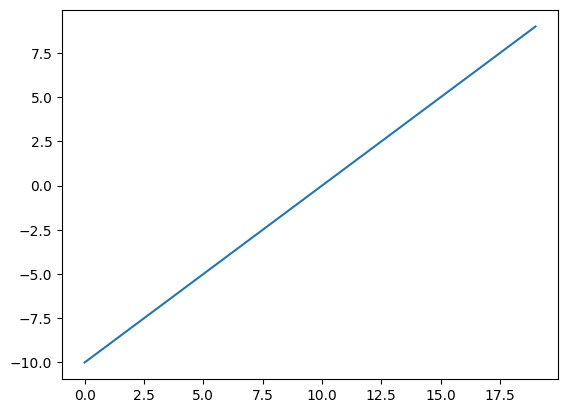

In [ ]:
plt.plot(A)

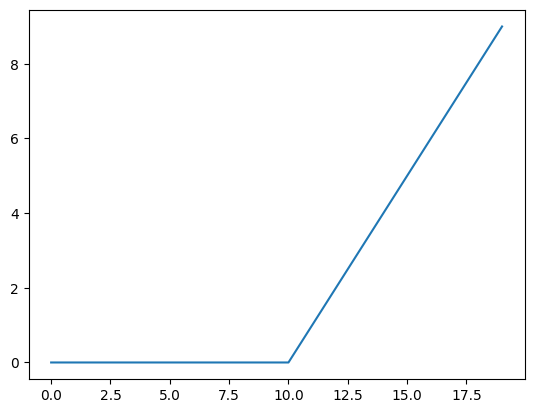

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
torch.relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

In [ ]:
def relu(x: torch.Tensor)-> torch.Tensor:
  return torch.maximum(torch.tensor(0),x)

In [ ]:
relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

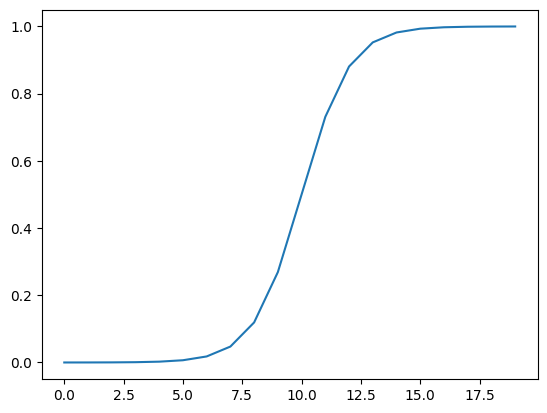

In [ ]:
plt.plot(torch.sigmoid(A))

#Putting all it together with Multiclass classification Model

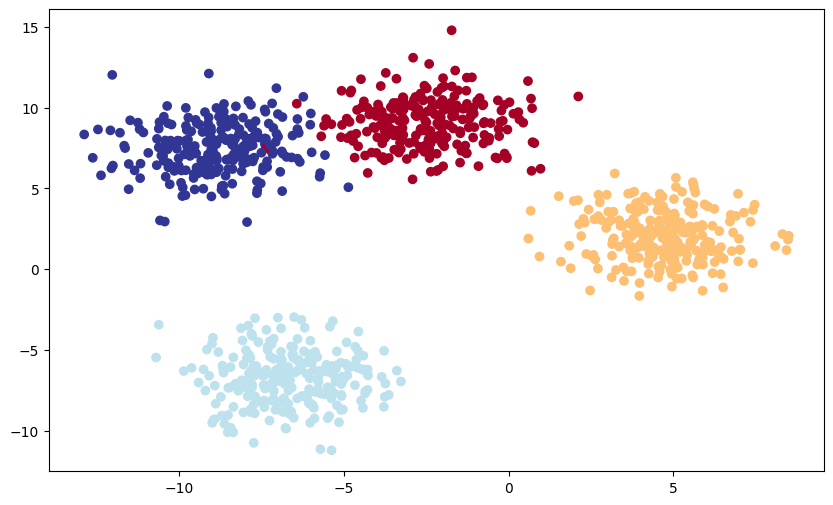

In [ ]:
#creating blob dataset
import torch
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

#set hyperparameters
NUM_FEATURES=2
NUM_CLASSES=4
RANDOM_SEED=42

#create blob dataset
x_blob,y_blob=make_blobs(
    n_samples=1000,
    n_features=NUM_FEATURES,
    centers=NUM_CLASSES,
    cluster_std=1.5, #give e cluster little shake up
    random_state=RANDOM_SEED
)

#Turn data into tensor
X_blob=torch.from_numpy(x_blob).type(torch.float)
y_blob=torch.from_numpy(y_blob).type(torch.float)

#split dataset
X_blob_train,X_blob_test,y_blob_train,y_blob_test=train_test_split(x_blob,y_blob,
                                                                   test_size=0.2,
                                                                   random_state=RANDOM_SEED)

#plot data
plt.figure(figsize=(10,6))
plt.scatter(X_blob[:,0],X_blob[:,1],
            c=y_blob,
            cmap=plt.cm.RdYlBu)





#Building a multiclass classification model


In [ ]:
device='cida' if torch.cuda.is_available() else 'cpu'

In [ ]:
device

'cpu'

In [ ]:
class blobmodel(nn.Module):
  def __init__(self,in_features,out_features,hidden_units):
    super().__init__()
    self.layer_stacked=nn.Sequential(
        nn.Linear(in_features=in_features,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,out_features=out_features)

    )
  def forward(self,x): # Define the forward method
    return self.layer_stacked(x)


In [ ]:
model_4=blobmodel(in_features=NUM_FEATURES,
                  out_features=NUM_CLASSES,
                  hidden_units=8).to(device)


In [ ]:
model_4

blobmodel(
  (layer_stacked): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [ ]:
X_blob_train.shape

(800, 2)

In [ ]:
y_blob_train[:10]

tensor([1., 0., 2., 2., 0., 0., 0., 1., 3., 0.])

In [ ]:
torch.unique(y_blob_train)

tensor([0., 1., 2., 3.])

In [ ]:
#create loss function and optimizer for classification model
loss=nn.CrossEntropyLoss()

#optimizer
optimizer=torch.optim.SGD(model_4.parameters(),
                          lr=0.1)

In [ ]:
next(model_4.parameters()).device

device(type='cpu')

In [ ]:
#getting prediction
model_4.eval()
with torch.inference_mode():
  y_pred=model_4(torch.tensor(X_blob_test,dtype=torch.float).to(device))

In [ ]:
y_pred[:10]


tensor([[-0.1343, -0.2370, -0.0892,  0.4084],
        [-0.7287, -0.3150, -0.3083,  1.0743],
        [ 0.0334, -0.5814,  0.1323,  0.0696],
        [-0.0599, -0.2021, -0.0579,  0.2893],
        [-0.6438, -0.4344, -0.2812,  1.2078],
        [-0.8644, -0.3450, -0.3689,  1.2199],
        [ 0.0274, -0.5014,  0.1267,  0.1003],
        [-0.5847, -0.3433, -0.2221,  1.0905],
        [ 0.0276, -0.7251,  0.1367,  0.0413],
        [-0.5942, -0.3739, -0.2402,  1.1150]])

In [ ]:
y_blob_test[:10]

tensor([1., 3., 2., 1., 0., 3., 2., 0., 2., 0.])

In [ ]:
y_pred_l=torch.softmax(y_pred,dim=1)

In [ ]:
y_pred_l[:10]

tensor([[0.2142, 0.1933, 0.2241, 0.3685],
        [0.0990, 0.1497, 0.1507, 0.6006],
        [0.2716, 0.1469, 0.2999, 0.2816],
        [0.2332, 0.2023, 0.2337, 0.3307],
        [0.0996, 0.1228, 0.1431, 0.6345],
        [0.0809, 0.1360, 0.1328, 0.6503],
        [0.2653, 0.1563, 0.2930, 0.2854],
        [0.1105, 0.1407, 0.1588, 0.5900],
        [0.2778, 0.1308, 0.3098, 0.2816],
        [0.1087, 0.1355, 0.1549, 0.6008]])

In [ ]:
#convert to labels
y_pred=torch.argmax(y_pred_l,dim=1)
y_pred

tensor([3, 3, 2, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
        2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3,
        3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3,
        3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3,
        2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2,
        2, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 2, 3,
        2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 2, 2, 3, 3, 2, 2, 3, 3,
        3, 3, 2, 3, 3, 3, 2, 3])

In [ ]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train)
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

AttributeError: 'numpy.ndarray' object has no attribute 'to'

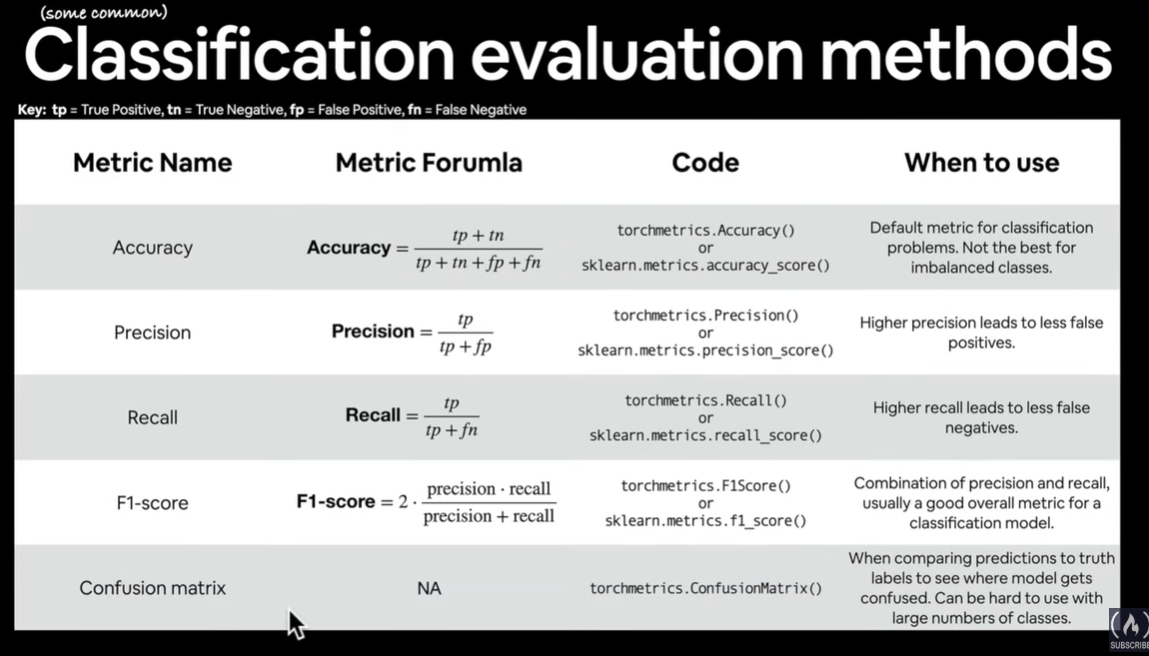